# Data Analysis

In [1]:
from src.benchmarks import *
from src.preprocessing import *
from IPython.display import display, HTML
from string import ascii_letters
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = 'bio_dataset'
datatype = 'epigenomic'
tasks = ['A-E', 'A-P', 'A-X', 'I-E', 'I-P', 'I-X']
col = ['enanchers', 'promoters', 'exons']
row = ['active', 'inactive']

W0630 20:49:15.567107 139704091797120 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
Using TensorFlow backend.
/usr/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Loading data from mongodb

In [2]:
data0 = [get_from_db(dataset, 'GM12878', task) for task in tasks]
data1 = [get_from_db(dataset, 'HelaS3', task) for task in tasks]
data2 = [get_from_db(dataset, 'HepG2', task) for task in tasks]
data3 = [get_from_db(dataset, 'K562', task) for task in tasks]

## Show number of samples for every lines

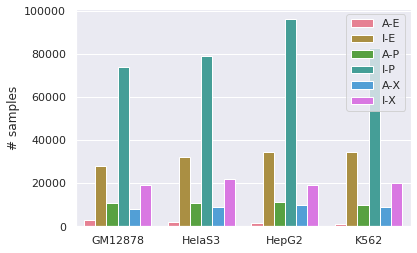

In [3]:
sns.set(style="darkgrid")

gm12878 = data0[0] + data0[3] + data0[1] + data0[4] + data0[2] + data0[5]
gm12878 = pd.DataFrame(gm12878)
gm12878['line'] = 'GM12878'

HelaS3 = data1[0] + data1[3] + data1[1] + data1[4] + data1[2] + data1[5]
HelaS3 = pd.DataFrame(HelaS3)
HelaS3['line'] = 'HelaS3'

HepG2 = data2[0] + data2[3] + data2[1] + data2[4] + data2[2] + data2[5]
HepG2 = pd.DataFrame(HepG2)
HepG2['line'] = 'HepG2'

K562 = data3[0] + data3[3] + data3[1] + data3[4] + data3[2] + data3[5]
K562 = pd.DataFrame(K562)
K562['line'] = 'K562'

df = pd.concat([gm12878, HelaS3, HepG2, K562])

ax = sns.countplot(x="line", hue="label", data=df, linewidth=1, palette="husl");
plt.legend(loc=1)
ax.set(ylabel='# samples', xlabel='')
plt.savefig('data_counts.pdf', bbox_inches='tight', trasparent=True, pad_inches=0.2)

## GM12878

### Collection distribution by labels

In [4]:
df = pd.DataFrame(np.array(list(map(len, data0))).reshape(2,3), row, col)

# Collection data quantity by labels
display(df)

enanchers  promoters  exons
active         2878      10816   8226
inactive      28156      73891  19078

### Heatmap by tasks

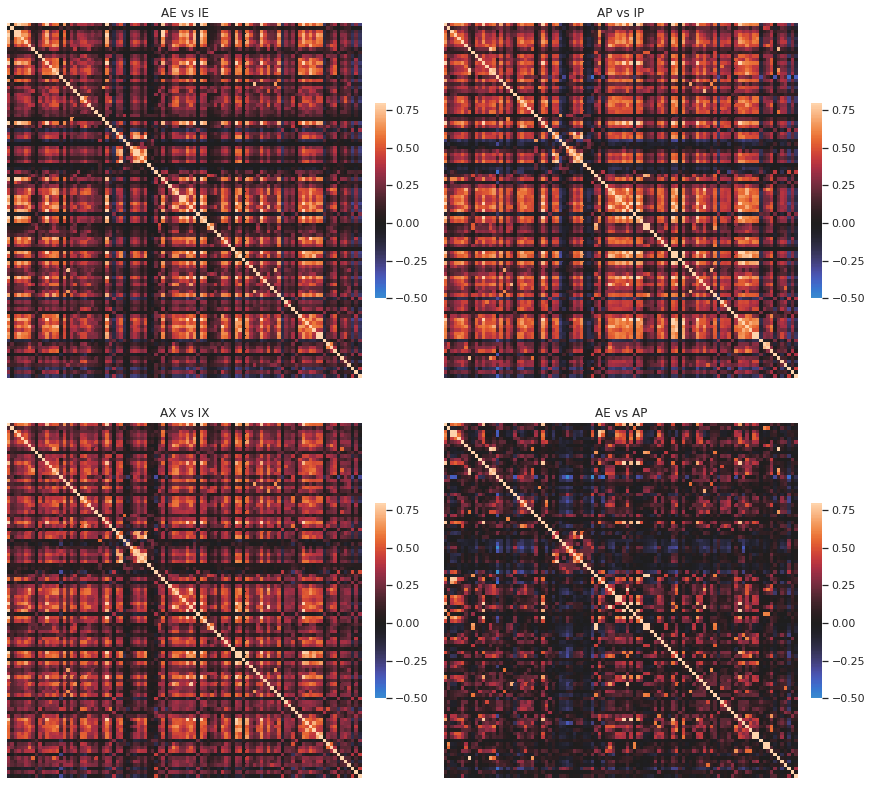

In [5]:
# Seaborn config
sns.set(style="white")
sns.set(font_scale=1)

# Heatmap for the collection by tasks
ae_ie = pd.DataFrame([i[datatype] for i in data0[0] + data0[3]]).corr()
ap_ip = pd.DataFrame([i[datatype] for i in data0[1] + data0[4]]).corr()
ax_ix = pd.DataFrame([i[datatype] for i in data0[2] + data0[5]]).corr()
ae_ap = pd.DataFrame([i[datatype] for i in data0[0] + data0[1]]).corr()

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,11), constrained_layout=True)
ax1.set_title('AE vs IE')
ax2.set_title('AP vs IP')
ax3.set_title('AX vs IX')
ax4.set_title('AE vs AP')
sns.heatmap(ae_ie, ax=ax1, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ap_ip, ax=ax2, vmax=.8, vmin=-.5, center=0, xticklabels=False,yticklabels= False, 
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ax_ix, ax=ax3, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ae_ap, ax=ax4, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})

plt.savefig('GM12878_heatmap_by_tasks.png', bbox_inches='tight', trasparent=True, pad_inches=0.5)

## HelaS3

### Collection distribution by labels

In [6]:
df = pd.DataFrame(np.array(list(map(len, data1))).reshape(2,3), row, col)

# Collection data quantity by labels
display(df)

enanchers  promoters  exons
active         1847      10759   9123
inactive      32179      79004  22071

### Heatmap by tasks

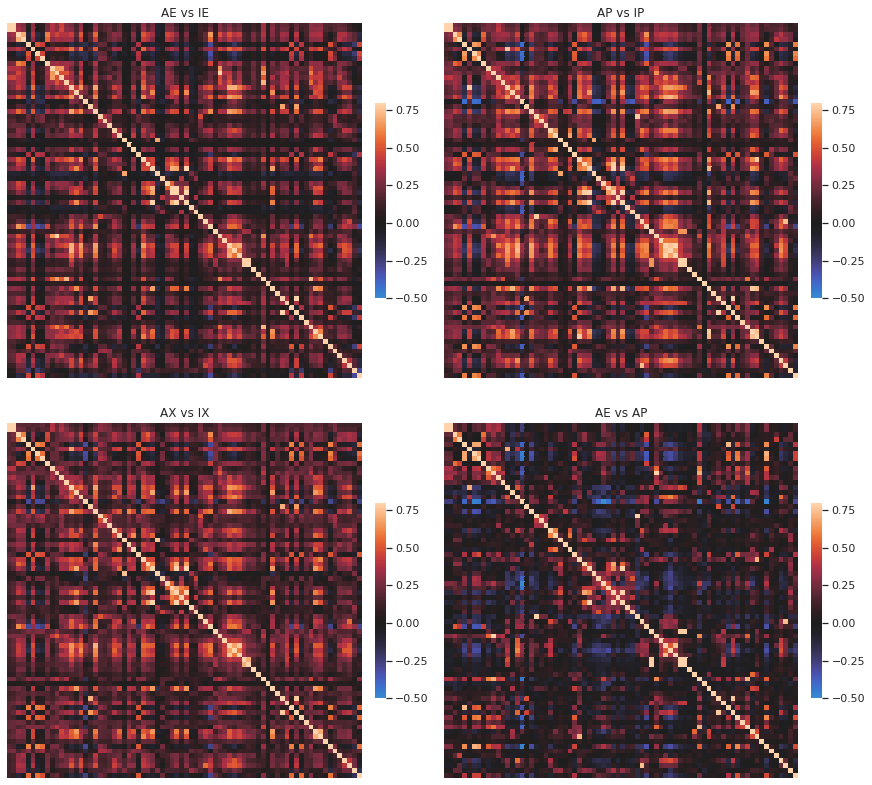

In [7]:
# Seaborn config
sns.set(style="white")
sns.set(font_scale=1)

# Heatmap for the collection by tasks
ae_ie = pd.DataFrame([i[datatype] for i in data1[0] + data1[3]]).corr()
ap_ip = pd.DataFrame([i[datatype] for i in data1[1] + data1[4]]).corr()
ax_ix = pd.DataFrame([i[datatype] for i in data1[2] + data1[5]]).corr()
ae_ap = pd.DataFrame([i[datatype] for i in data1[0] + data1[1]]).corr()

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,11), constrained_layout=True)
ax1.set_title('AE vs IE')
ax2.set_title('AP vs IP')
ax3.set_title('AX vs IX')
ax4.set_title('AE vs AP')

sns.heatmap(ae_ie, ax=ax1, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ap_ip, ax=ax2, vmax=.8, vmin=-.5, center=0, xticklabels=False,yticklabels= False, 
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ax_ix, ax=ax3, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ae_ap, ax=ax4, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})

plt.savefig('HelaS3_heatmap_by_tasks.png', bbox_inches='tight', trasparent=True, pad_inches=0.5)

## HepG2

### Collection distribution by labels

In [8]:
df = pd.DataFrame(np.array(list(map(len, data2))).reshape(2,3), row, col)

# Collection data quantity by labels
display(df)

enanchers  promoters  exons
active         1465      11467   9931
inactive      34556      96184  19071

### Heatmap by tasks

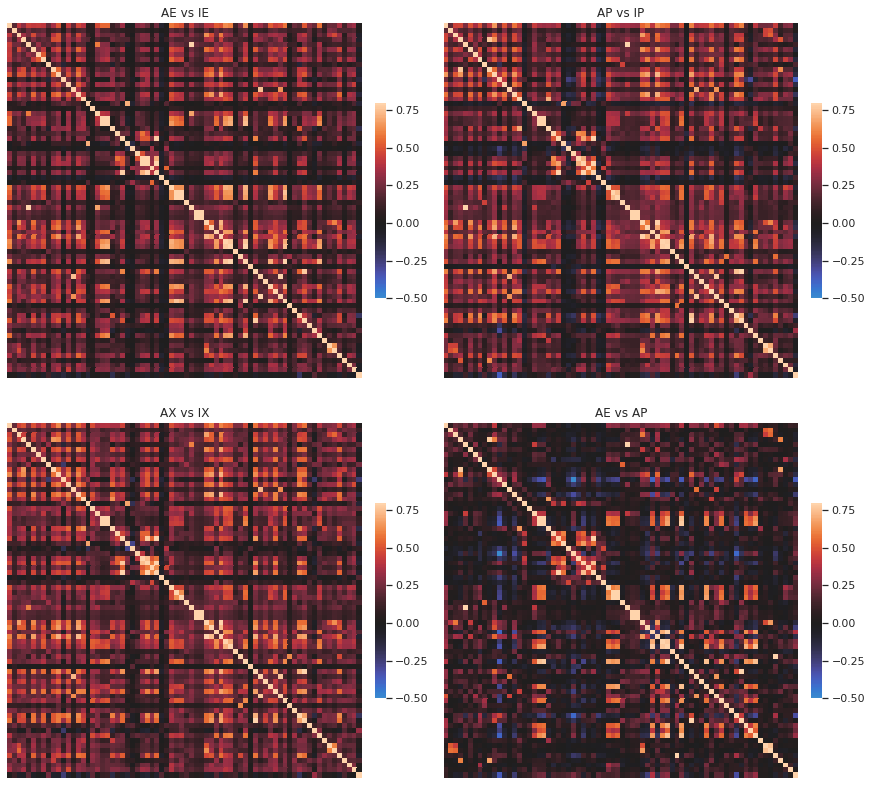

In [9]:
# Seaborn config
sns.set(style="white")
sns.set(font_scale=1)

# Heatmap for the collection by tasks
ae_ie = pd.DataFrame([i[datatype] for i in data2[0] + data2[3]]).corr()
ap_ip = pd.DataFrame([i[datatype] for i in data2[1] + data2[4]]).corr()
ax_ix = pd.DataFrame([i[datatype] for i in data2[2] + data2[5]]).corr()
ae_ap = pd.DataFrame([i[datatype] for i in data2[0] + data2[1]]).corr()

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,11), constrained_layout=True)
ax1.set_title('AE vs IE')
ax2.set_title('AP vs IP')
ax3.set_title('AX vs IX')
ax4.set_title('AE vs AP')

sns.heatmap(ae_ie, ax=ax1, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ap_ip, ax=ax2, vmax=.8, vmin=-.5, center=0, xticklabels=False,yticklabels= False, 
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ax_ix, ax=ax3, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ae_ap, ax=ax4, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})

plt.savefig('HepG2_heatmap_by_tasks.png', bbox_inches='tight', trasparent=True, pad_inches=0.5)

## K562

### Collection distribution by labels

In [10]:
df = pd.DataFrame(np.array(list(map(len, data3))).reshape(2,3), row, col)

# Collection data quantity by labels
display(df)

enanchers  promoters  exons
active          894      10076   9033
inactive      34392      82829  20261

### Heatmap by tasks

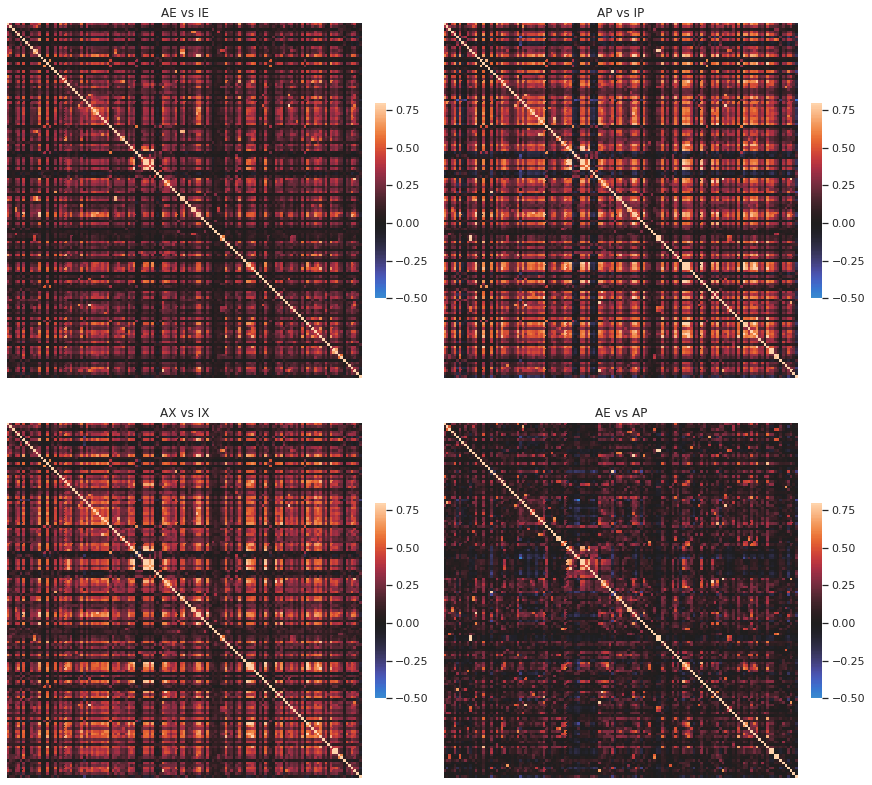

In [11]:
# Seaborn config
sns.set(style="white")
sns.set(font_scale=1)

# Heatmap for the collection by tasks
ae_ie = pd.DataFrame([i[datatype] for i in data3[0] + data3[3]]).corr()
ap_ip = pd.DataFrame([i[datatype] for i in data3[1] + data3[4]]).corr()
ax_ix = pd.DataFrame([i[datatype] for i in data3[2] + data3[5]]).corr()
ae_ap = pd.DataFrame([i[datatype] for i in data3[0] + data3[1]]).corr()

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,11), constrained_layout=True)
ax1.set_title('AE vs IE')
ax2.set_title('AP vs IP')
ax3.set_title('AX vs IX')
ax4.set_title('AE vs AP')

sns.heatmap(ae_ie, ax=ax1, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ap_ip, ax=ax2, vmax=.8, vmin=-.5, center=0, xticklabels=False,yticklabels= False, 
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ax_ix, ax=ax3, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})
sns.heatmap(ae_ap, ax=ax4, vmax=.8, vmin=-.5, center=0, xticklabels=False, yticklabels=False,
            square=True, cbar_kws={"shrink": .5})

plt.savefig('K562_heatmap_by_tasks.png', bbox_inches='tight', trasparent=True, pad_inches=0.5)